In [1]:
import numpy as np
import cv2
from sklearn import cluster
import matplotlib.pyplot as plt

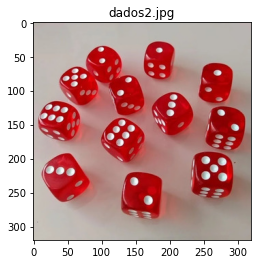

In [2]:
#PLT IMSHOW UTILIZA GBR AO INVÉS RGB
#É PRECISO CONVERTER PARA RGB
image = cv2.imread('dados2.jpg')
rgb_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = rgb_img.copy()
plt.imshow(image)
plt.title('dados2.jpg')
plt.show()

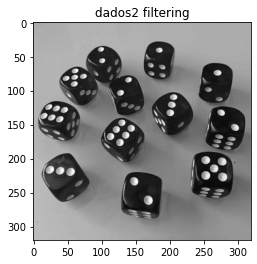

In [3]:
#filtering for dados2.jpg
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
image = cv2.blur(image, (3,3))
ret, image = cv2.threshold(image, 220, 255, cv2.THRESH_BINARY_INV)
kernel = np.ones((4,4), np.uint8)
image = cv2.erode(image, kernel, iterations=1)
plt.imshow(gray, cmap='gray')
plt.title('dados2 filtering')
plt.show()

In [4]:
#parâmetros do blob detector para dados2
#este utilizará blob color diferente
params = cv2.SimpleBlobDetector_Params()
params.blobColor = 0
params.minDistBetweenBlobs = 1
detector = cv2.SimpleBlobDetector_create(params)

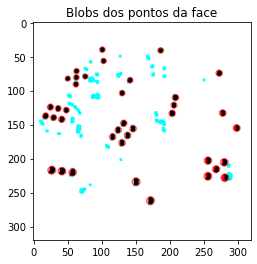

In [5]:
#detectar os blobs para contar os dados a partir destes
#Os circulos vermelhos (255,0,0) representam os pontos detectados
#Por conta do CMAP utilizado em plt.show, que é o GBR, aparecerá ruído de pixel azul
#mas estes não impedirão a clusterização, as coordenadas já estão armazenadas nos keypoints
keypoints = detector.detect(image)
img_with_keypoints = cv2.drawKeypoints(
    image, keypoints, np.array([]), (255, 0, 0),
    cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)
plt.imshow(img_with_keypoints)
plt.title('Blobs dos pontos da face')
plt.show()

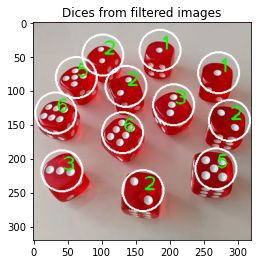

In [6]:
#Similar à clusterização em dados1, porém o epsilon será 35
X = []
for b in keypoints:
    position = b.pt
    if position != None:
        X.append(position)
X = np.asarray(X)
if len(X)>0:
    clustering = cluster.DBSCAN(eps=35, min_samples=0).fit(X)
    num_dice = max(clustering.labels_) + 1
    for i in range(num_dice):
        X_dice = X[clustering.labels_==i]
        centroid_dice = np.mean(X_dice, axis=0)   
        position = (int(centroid_dice[0]), int(centroid_dice[1]))
        image = cv2.circle(rgb_img, position , 30, (255,255,255), 2)
        cv2.putText(
            image, str(len(X_dice)), position, cv2.FONT_HERSHEY_PLAIN, 2,
            (0,255,0), 2
        )

plt.imshow(image)
plt.title('Dices from filtered images')
plt.show()